# Analysis Task:
------------
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis
- Find the age distribution of employees in IBM
- Explore attrition by age
- Explore data for Left employees
- Find out the distribution of employees by the education field
- Give a bar chart for the number of married and unmarried employees
- Build up a logistic regression model to predict which employees are likely to attrite.

-------------
# 1- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy and seaborn.

In [1]:
# Import libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import dataset by using pandas.
data = pd.read_csv('D://IBM HR Analytics Employee Attrition Modeling/Data/IBM Attrition Data.csv')

------------
# 2- Exploratory data analysis

In [3]:
# Show the first five rows from the dataset.
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
# Show the last five rows from the dataset.
data.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [5]:
# Check the shape of the dataset(count of coulmns and rows).
print(data.shape)
print('count of rows',data.shape[0])
print('count of columns',data.shape[1])

(1470, 13)
count of rows 1470
count of columns 13


- There are 1470 rows and 13 columns.

In [6]:
# Get more informations about our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


- There are four object columns and nine integer columns.

In [7]:
# Check the null valuse.
data.isna().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EnvironmentSatisfaction    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
WorkLifeBalance            False
YearsAtCompany             False
dtype: bool

- No null values in the dataset.

In [8]:
# Check the duplicates in the data.
data.duplicated().sum()

0

- No duplicates in the dataset.

In [9]:
# Get overall statistics of the datase.
data.describe().round(2).T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.920000,9.140000,18.000000,30.000000,36.000000,43.000000,60.000000
DistanceFromHome,1470.000000,9.190000,8.110000,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.910000,1.020000,1.000000,2.000000,3.000000,4.000000,5.000000
EnvironmentSatisfaction,1470.000000,2.720000,1.090000,1.000000,2.000000,3.000000,4.000000,4.000000
JobSatisfaction,1470.000000,2.730000,1.100000,1.000000,2.000000,3.000000,4.000000,4.000000
MonthlyIncome,1470.000000,6502.930000,4707.960000,1009.000000,2911.000000,4919.000000,8379.000000,19999.000000
NumCompaniesWorked,1470.000000,2.690000,2.500000,0.000000,1.000000,2.000000,4.000000,9.000000
WorkLifeBalance,1470.000000,2.760000,0.710000,1.000000,2.000000,3.000000,3.000000,4.000000
YearsAtCompany,1470.000000,7.010000,6.130000,0.000000,3.000000,5.000000,9.000000,40.000000


------------
# 3- Find the age distribution of employees in IBM.

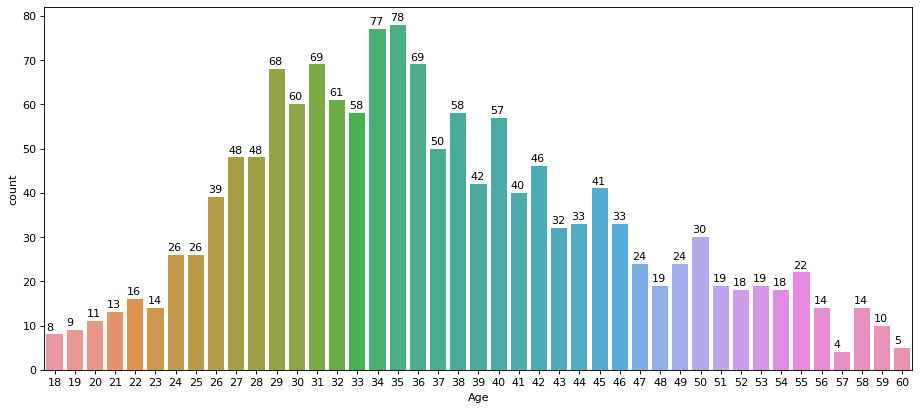

In [10]:
# Show the age distribution of employees in IBM in a count plot.
plt.figure(figsize=(14,6),dpi=80)
ax = sns.countplot(x=data['Age'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+ 1, '%.0f'%(height))
plt.show()

---------------
# 4- Explore attrition by age.

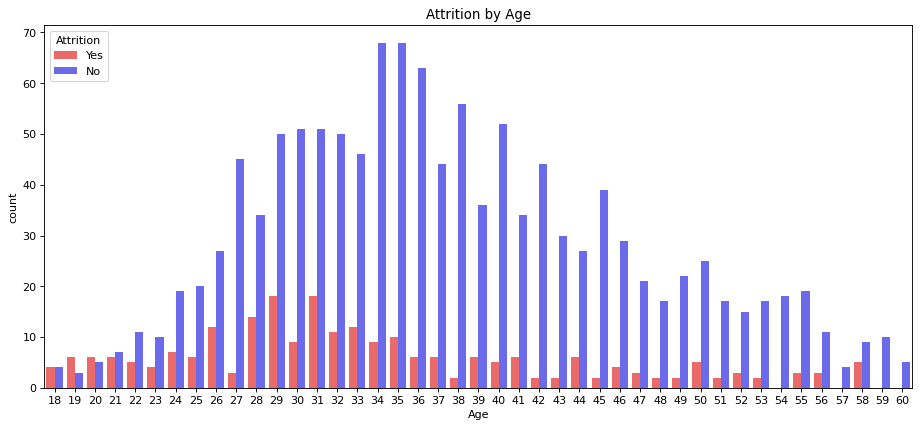

In [11]:
# Show the attrition by age in a count plot.
plt.figure(figsize=(14,6),dpi=80)
sns.countplot(data=data,x='Age',hue='Attrition', palette='seismic_r')
plt.title('Attrition by Age')
plt.show()

----------------
# 5- Explore data for Left employees.

In [12]:
# Explore count of left employees.
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- There are 237 Attrition employees.

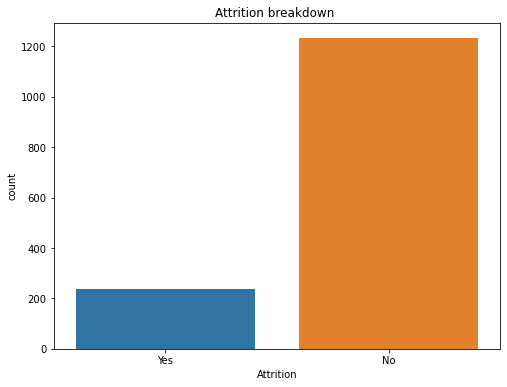

In [13]:
# explore data for Left employees breakdown.
plt.figure(figsize=(8,6))
sns.countplot(x=data['Attrition'])
plt.title("Attrition breakdown ")
plt.show()

--------------
# 6- Find out the distribution of employees by the education field.

In [14]:
# Find the value counts of the Education Field.
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

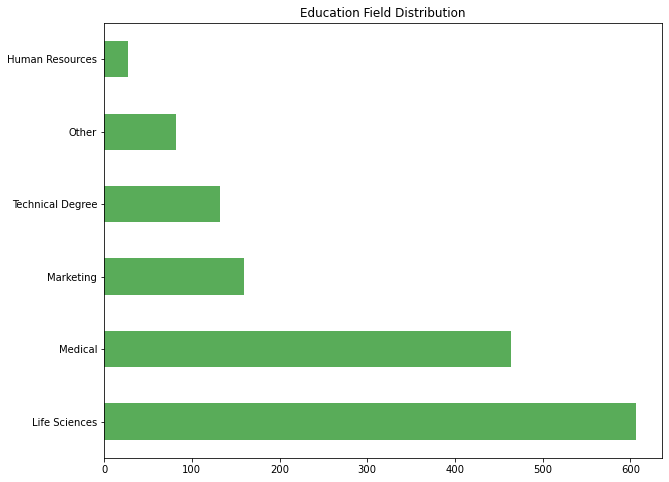

In [15]:
# explore data for Education Field distribution in a barh chart.
plt.figure(figsize=(10,8))
data.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

-------------
# 7- Give a bar chart for the number of married and unmarried employees.

In [16]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

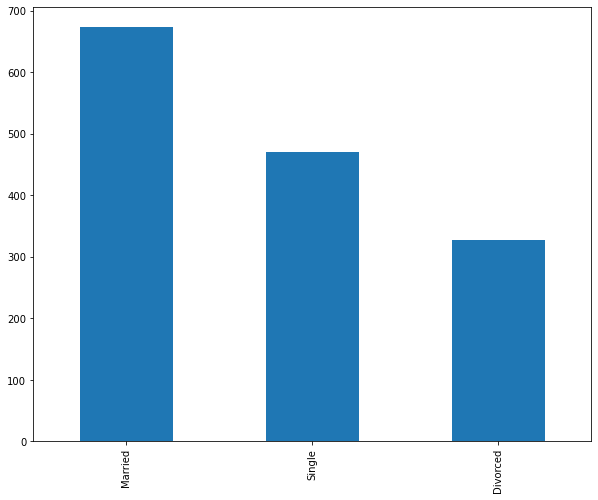

In [17]:
# Show the number of married and unmarried employees in a bar chart.
plt.figure(figsize=(10,8))
data.MaritalStatus.value_counts().plot(kind='bar')
plt.show()

------------
# 8- Build up a logistic regression model to predict which employees are likely to attrite.

###### Convert the objective data to numerical data.

In [18]:
# Find the values of the Attrition values.
data['Attrition'].value_counts() 

No     1233
Yes     237
Name: Attrition, dtype: int64

In [19]:
# Convert Attrition column to numerical.
data['Attrition'] = pd.get_dummies(data['Attrition'],drop_first=True)

In [20]:
# Find the values of the Department values.
data['Department'].value_counts() 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [21]:
# Convert Department column to numerical.
data['Department'] = data['Department'].map({'Human Resources':0,'Sales':1,'Research & Development':2})

In [22]:
# Find the values of the EducationField values.
data['EducationField'].value_counts() 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [23]:
# Convert Attrition column to numerical.
data['EducationField'] = data['EducationField'].map({'Human Resources':0,'Other':1,'Technical Degree':2,'Marketing':3,'Medical':4,'Life Sciences':5})

In [24]:
# Find the values of the MaritalStatus values.
data['MaritalStatus'].value_counts() 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [25]:
# Convert MaritalStatus column to numerical.
data['MaritalStatus'] = data['MaritalStatus'].map({'Divorced':2,'Single':0,'Married':1})

###### Take another look of the dataset.

In [26]:
data.sample(5)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1201,23,1,2,8,1,4,4,3,0,3989,1,3,5
186,40,0,2,4,1,4,4,3,1,19033,1,3,20
1329,29,0,0,6,1,4,4,2,1,2804,1,3,1
137,39,0,1,4,4,5,4,3,1,5902,4,4,15
578,38,0,2,2,4,5,1,1,0,5980,6,3,15


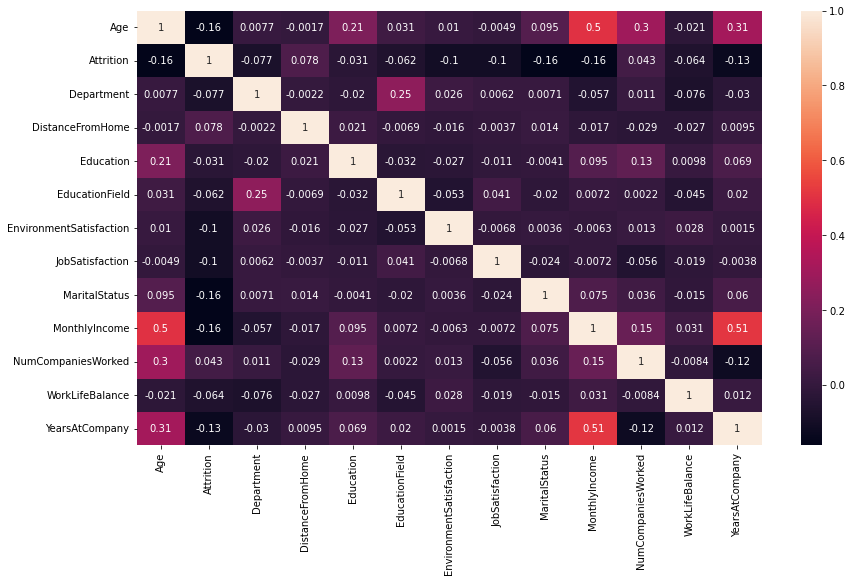

In [27]:
# Show the corrolation between all columns in a heatmap.
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

###### Split the data into features X and target y.

In [28]:
# X will be the features without the vector(Attrition).
X = data.drop('Attrition',axis=1)

In [29]:
# y will be the vector Attrition.
y = data['Attrition']

###### Split X ,y into training dataset and testing dataset.

In [30]:
# Import trian_test_split algorizm from sklearn library.
from sklearn.model_selection import train_test_split

In [31]:
# Split X, y into X_trian,X_test,y_train,y_test.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
# Import standard scaler.
from sklearn.preprocessing import StandardScaler

In [33]:
scal = StandardScaler()

In [34]:
X_train = scal.fit_transform(X_train )
X_test = scal.transform(X_test)

###### Training the model using LogisticRegression.

In [35]:
# Import LogisticRegression from sklearn.
from sklearn.linear_model import LogisticRegression

In [36]:
# Fit the model using logistic Regression.
log = LogisticRegression()
log.fit(X_train,y_train)
log.score(X_train,y_train)

0.8445092322643343

In [37]:
# Predict the vector by the model.
y_pred = log.predict(X_test)

In [38]:
# Import accuracy score from sklearn.
from sklearn.metrics import accuracy_score

In [39]:
# Get the accuracy of the log model.
accuracy_score(y_test,y_pred)

0.8616780045351474

In [40]:
# Import classification report from sklearn.
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       380
           1       0.50      0.13      0.21        61

    accuracy                           0.86       441
   macro avg       0.69      0.56      0.57       441
weighted avg       0.82      0.86      0.83       441



In [42]:
# Find a sample data and put it in a varible named sample_data.
sample_data = data.sample(1)
X_sample = sample_data.drop('Attrition',axis=1).values
y_sample = sample_data['Attrition'].values
X_sample_scal = scal.transform(sample_data.drop('Attrition',axis=1))
print('X = ',X_sample)
print('y = ',y_sample)

X =  [[  21    2    1    1    2    4    2    0 2070    1    4    2]]
y =  [0]


In [43]:
# Test the model with a sample data.
prediction = log.predict(X_sample_scal)[0]
if prediction == 0:
    print('The employee will not attrition')
else:
    print('The employee will attrition')

The employee will not attrition
